# Unsupervised Learning

In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from scipy.stats import mode

from io import StringIO
import requests
import json
import pandas as pd

import random

In [2]:
years = ["2015", "2016", "2017"]
vehiclesToKeep = ["ST_CASE", "MAKE", "MODEL", "MOD_YEAR", "MAK_MOD"]
accidentsToKeep = ["STATE", "ST_CASE", "FATALS"]

dframes_acc = []
dframes_veh = []

for year in years:
    df_accidents = pd.read_csv("Data/"+year+"/ACCIDENT.csv")
    df_vehicles = pd.read_csv("Data/"+year+"/VEHICLE.csv")
    df_vehicles_copy = df_vehicles[vehiclesToKeep]
    df_accidents_copy = df_accidents[accidentsToKeep]
    dframes_acc.append(df_accidents_copy)
    dframes_veh.append(df_vehicles_copy)

df_vehicles = pd.concat(dframes_veh).sample(frac=1)
df_accidents = pd.concat(dframes_acc).sample(frac=1)
    
#Find blank or whitespace
df_accidents = df_accidents.replace(r'\s+\t+', np.nan, regex=True).replace('', np.nan)
df_vehicles = df_vehicles.replace(r'\s+\t+', np.nan, regex=True).replace('', np.nan)


print(df_vehicles.isnull().sum())

#Find blank or whitespace
print(df_accidents.isnull().sum())

c:\users\mulic\.virtualenvs\mscs-project-idlnp3ap\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (36,37,102) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
c:\users\mulic\.virtualenvs\mscs-project-idlnp3ap\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (101,102) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


ST_CASE     0
MAKE        0
MODEL       0
MOD_YEAR    0
MAK_MOD     0
dtype: int64
STATE      0
ST_CASE    0
FATALS     0
dtype: int64


In [13]:
df_merge = pd.merge(df_accidents, df_vehicles, on="ST_CASE")
print(len(df_merge))
# Find the outliers / unknown values
df_merge = df_merge.loc[(df_merge["MAKE"] != 97) & 
                        (df_merge["MAKE"] != 98) & 
                        (df_merge["MAKE"] != 99) & 
                        (df_merge["MODEL"] != 999) &
                        (df_merge["MOD_YEAR"] != 9999)]
df_merge['MULTI_FATAL'] = np.where(df_merge['FATALS']>1, 1, 0)

447731


In [14]:
#It is also possible to replace elements with an arbitrary value only when the condition 
#is satisfied or only when the condition is not satisfied.
# If you pass the original ndarray to x and y, the original value is used as it is.
model_conds = [(df_merge['MODEL'] >= 1) & (df_merge['MODEL'] <= 397),
               df_merge['MODEL'] == 398,
               df_merge['MODEL'] == 399,
               (df_merge['MODEL'] >= 401) & (df_merge['MODEL'] <= 497),
               df_merge['MODEL'] == 498,
               df_merge['MODEL'] == 499,
               df_merge['MODEL'] == 598,
               df_merge['MODEL'] == 599,
               (df_merge['MODEL'] >= 701) & (df_merge['MODEL'] <= 706),
               df_merge['MODEL'] == 707,
               df_merge['MODEL'] == 709,
               (df_merge['MODEL'] >= 731) & (df_merge['MODEL'] <= 734),
               df_merge['MODEL'] == 739,
               df_merge['MODEL'] == 799,
               (df_merge['MODEL'] >= 801) & (df_merge['MODEL'] <= 809),
               df_merge['MODEL'] == 850,
               df_merge['MODEL'] == 870,
               df_merge['MODEL'] == 880,
               df_merge['MODEL'] == 881,
               df_merge['MODEL'] == 882,
               df_merge['MODEL'] == 883,
               df_merge['MODEL'] == 884,
               df_merge['MODEL'] == 890,
               df_merge['MODEL'] == 898,
               (df_merge['MODEL'] >= 901) & (df_merge['MODEL'] <= 908),
               (df_merge['MODEL'] >= 981) & (df_merge['MODEL'] <= 987),
               df_merge['MODEL'] == 988,
               df_merge['MODEL'] == 989,
               df_merge['MODEL'] == 997,
               df_merge['MODEL'] == 998]
# model_out = ["Automobiles",
#             "Other(Autos)",
#             "Unknown (Autos)",
#             "Light Trucks",
#             "Other (Light Trucks)",
#             "Unknown (LT)",
#             "Other (LSV or NEV)",
#             "Unknown (LSV OR NEV)",
#             "Motorcycles",
#             "Electric Motorcycle",
#             "Unknown cc (Motorcycles)",
#             "All-Terrain Vehicles",
#             "Unknown cc (ATV)"
#             "Unkown (motored cycle)",
#             "Other Make (Med/Heavy Trucks)",
#             "Motor Home",
#             "Med/Heavy Van-Based Vehicle",
#             "Med/Heavy Pickup",
#             "Med/Heavy Trucks - CBE",
#             "Med/Heavy Trucks - COE",
#             "Med/Heavy Trucks - COE (low entry)",
#             "Med/Heavy Trucks - COE (high entry)",
#             "Med/Heavy Trucks - Unknown engine location",
#             "Med/Heavy Trucks - COE (entry position unknown)",
#             "Other (Med/Heavy Trucks)",
#             "Other Make (Buses)",
#             "Buses",
#             "Other (Bus)",
#             "Unknown (Bus)",
#             "Not Reported",
#             "Other (Vehicle)"]
model_out = [
0,
1,
2,
3,
4,
5,
6,
7,
8,
9,
10,
11,
12,
13,
14,
15,
16,
17,
18,
19,
20,
21,
22,
23,
24,
25,
26,
27,
28,
29
]

print(len(model_conds))
print(len(model_out))

df_merge["MODEL_TRANS"] = np.select(model_conds, model_out, default=np.nan)
print(df_merge["MODEL_TRANS"])

print(df_merge.isnull().sum())
print(df_merge.loc[df_merge["MODEL_TRANS"].isin([np.nan])])

30
30
0         0.0
1         3.0
2         3.0
3         0.0
4         3.0
         ... 
447726    3.0
447727    8.0
447728    0.0
447729    0.0
447730    3.0
Name: MODEL_TRANS, Length: 429167, dtype: float64
STATE          0
ST_CASE        0
FATALS         0
MAKE           0
MODEL          0
MOD_YEAR       0
MAK_MOD        0
MULTI_FATAL    0
MODEL_TRANS    0
dtype: int64
Empty DataFrame
Columns: [STATE, ST_CASE, FATALS, MAKE, MODEL, MOD_YEAR, MAK_MOD, MULTI_FATAL, MODEL_TRANS]
Index: []


In [15]:
df_merge.astype({'STATE':'str', 'ST_CASE':'str', 'MAKE':'str', 'MODEL':'str'}).dtypes

STATE           object
ST_CASE         object
FATALS           int64
MAKE            object
MODEL           object
MOD_YEAR         int64
MAK_MOD          int64
MULTI_FATAL      int32
MODEL_TRANS    float64
dtype: object

In [16]:
df_merge_1fatal = df_merge.loc[df_merge['MULTI_FATAL'] == False]
print(len(df_merge_1fatal))
df_merge_Nfatal = df_merge.loc[df_merge['MULTI_FATAL'] == True]
print(len(df_merge_Nfatal))

df_merge_1fatal_sample = df_merge_1fatal.sample(n=len(df_merge_Nfatal), replace=False)
print(len(df_merge_1fatal_sample))

395835
33332
33332


In [17]:
df_merge_1fatal_sample_rebrand = df_merge_1fatal_sample.copy()
df_merge_1fatal_sample_rebrand['MULTI_FATAL'] = False

df_merge_Nfatal_rebrand = df_merge_Nfatal.copy()
df_merge_Nfatal_rebrand['MULTI_FATAL'] = True

frames = [df_merge_Nfatal_rebrand, df_merge_1fatal_sample_rebrand]

df_merge_concat = pd.concat(frames).sample(frac=1)
print(df_merge_concat.head())
print(len(df_merge_concat))

        STATE  ST_CASE  FATALS  MAKE  MODEL  MOD_YEAR  MAK_MOD  MULTI_FATAL  \
386738      8    80126       1    49     49      2011    49049        False   
96516      20   200160       1    53    706      1992    53706        False   
13280      24   240316       2    12    880      2007    12880         True   
132656     13   130173       1    24      1      1994    24001        False   
254564      8    80289       2     7    442      2007     7442         True   

        MODEL_TRANS  
386738          0.0  
96516           8.0  
13280          17.0  
132656          0.0  
254564          3.0  
66664


In [50]:
# https://towardsdatascience.com/clustering-based-unsupervised-learning-8d705298ae51
X=df_merge_concat[['MODEL_TRANS', 'FATALS']]  # Features
# y=df_merge_concat['MULTI_FATAL']  # Labels

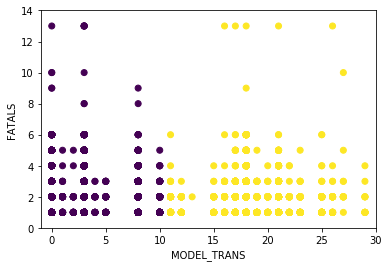

In [51]:
X=df_merge_concat[['MODEL_TRANS', 'FATALS']]  # Features
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py
from sklearn.cluster import KMeans

# # Declaring Model
# model = KMeans(init='k-means++', n_clusters=3)

# Prediction on the entire data
model = KMeans(init='k-means++', n_clusters=2)

model.fit_predict(X)
# all_predictions = model.predict(iris_df.data)
labels = model.labels_

#Plotting
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure(1, figsize=(7,7))
# ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
# # ax.scatter(X[':, 3'], X[:, 0], X[:, 2],
# #           c=labels.astype(np.float), edgecolor="k", s=50)
# ax.scatter(X['MOD_YEAR'], X['FATALS'], X['MODEL_TRANS'],
#           c=labels.astype(np.float), edgecolor="k", s=50)
# ax.set_xlabel("MOD_YEAR")
# ax.set_ylabel("FATALS")
# ax.set_zlabel("MODEL_TRANS")
# plt.title("K Means", fontsize=14)
x_min, x_max = X['MODEL_TRANS'].min() - 1, X['MODEL_TRANS'].max() + 1
y_min, y_max = X['FATALS'].min() - 1, X['FATALS'].max() + 1
plt.figure(1)
plt.clf()
plt.scatter(X['MODEL_TRANS'], X['FATALS'], c=labels)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
# plt.xticks(())
# plt.yticks(())
plt.xlabel("MODEL_TRANS")
plt.ylabel("FATALS")
plt.show()

Text(0.5, 0.92, 'K Means')

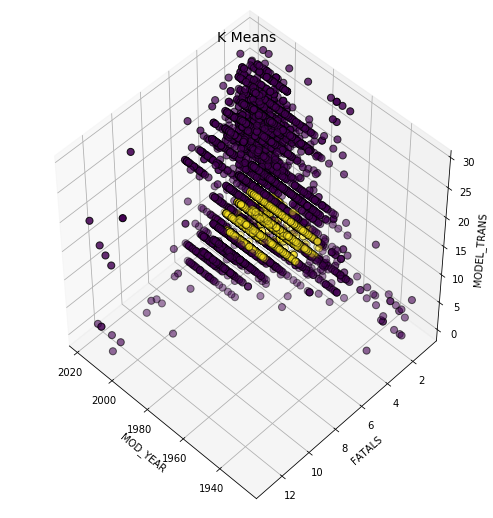

In [53]:
X=df_merge_concat[['MOD_YEAR', 'FATALS', 'MODEL_TRANS']]  # Features
# Mixture Models
from sklearn.mixture import GaussianMixture

# # Declaring Model
# model = KMeans(init='k-means++', n_clusters=3)

# Prediction on the entire data
model = GaussianMixture(n_components=2)

labels = model.fit_predict(X)
# all_predictions = model.predict(iris_df.data)
# proba_lists = model.predict_proba(X)

#Plotting
from mpl_toolkits.mplot3d import Axes3D
# colored_arrays = np.matrix(proba_lists)
# colored_tuples = [tuple(i.tolist()[0]) for i in colored_arrays]

fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
# ax.scatter(X[':, 3'], X[:, 0], X[:, 2],
#           c=labels.astype(np.float), edgecolor="k", s=50)
ax.scatter(X['MOD_YEAR'], X['FATALS'], X['MODEL_TRANS'],
          c=labels, edgecolor="k", s=50)
ax.set_xlabel("MOD_YEAR")
ax.set_ylabel("FATALS")
ax.set_zlabel("MODEL_TRANS")
plt.title("K Means", fontsize=14)